In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"hr_employee_data.csv")
df.head(10)

,EmployeeID,Name,Age,Gender,Department,Position,Years_at_Company,Monthly_Salary,Education_Level,Performance_Score,Last_Appraisal_Year,Left_Company
0,1,Employee_1,50.0,Female,HR,Manager,21,6058.0,PhD,3.95,2021,No
1,2,Employee_2,36.0,Male,Marketing,Manager,18,6978.0,Masters,3.15,2022,No
2,3,Employee_3,29.0,Male,NaN,Intern,15,14169.0,PhD,4.36,2021,Yes
3,4,Employee_4,42.0,Male,IT,Assistant,20,9031.0,Bachelors,2.36,2024,No
4,5,Employee_5,NaN,NaN,Finance,Assistant,26,7120.0,PhD,NaN,2023,Yes
5,6,Employee_6,44.0,NaN,NaN,Manager,23,13378.0,Masters,4.98,2022,Yes
6,7,Employee_7,32.0,Non-Binary,IT,Intern,21,5485.0,Masters,2.26,2021,No
7,8,Employee_8,32.0,Female,Finance,Assistant,3,10612.0,Masters,3.70,2024,Yes
8,9,Employee_9,45.0,Male,Marketing,Assistant,1,NaN,PhD,4.38,2024,Yes
9,10,Employee_10,57.0,Female,Sales,Assistant,29,5047.0,Bachelors,4.66,2021,Yes


In [3]:
df.replace('NaN', np.nan, inplace=True)

### Fill missing values, median for numerical, and mode for categorical

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
df['Monthly_Salary'] = df['Monthly_Salary'].fillna(df['Monthly_Salary'].median())

### Department with the highest turnover

In [5]:
turnover = df[(df['Left_Company'] == 'Yes') & df['Department'].notna()]
turnover_count = turnover['Department'].value_counts().reset_index()
turnover_count.columns = ['Department', 'Number_Left']
turnover_count

,Department,Number_Left
0,Marketing,149
1,Finance,92
2,Sales,92
3,IT,85
4,HR,80


### What is the average salary by department?

In [6]:
dept_grp = df.groupby('Department')['Monthly_Salary'].mean().round(2).sort_values()
print(f"The average Salary by Department {dept_grp}")

The average Salary by Department Department
Marketing    8532.38
Finance      8739.96
HR           8789.11
Sales        8850.50
IT           8885.02
Name: Monthly_Salary, dtype: float64


<Axes: title={'center': 'What is the average Salary by Department'}, ylabel='Department'>

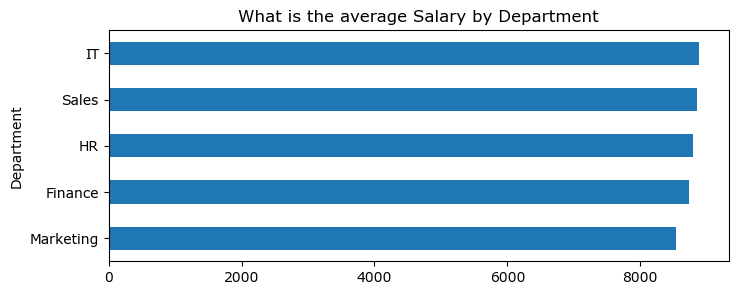

In [7]:
dept_grp.plot(kind='barh', figsize=(8,3), title='What is the average Salary by Department')

### What’s the average performance score by position

In [8]:
position_grp = df.groupby('Position')['Performance_Score'].mean().round(2)
print(f"The average performance score by position {position_grp}")

The average performance score by position Position
Analyst      2.89
Assistant    2.86
Executive    2.86
Intern       3.21
Manager      2.98
Name: Performance_Score, dtype: float64


<Axes: title={'center': 'What is the average Performance by Position'}>

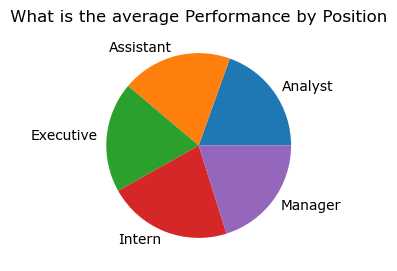

In [9]:
position_grp.plot(kind='pie', ylabel= '',figsize=(8,3), title='What is the average Performance by Position')

#### Do older employees tend to leave more?

In [10]:
stay = ((df['Age'] >= 42) & (df['Left_Company'] == 'Yes')).value_counts()
stay

False    730
True     270
Name: count, dtype: int64

<Axes: title={'center': 'Do older employees tend to leave more?'}>

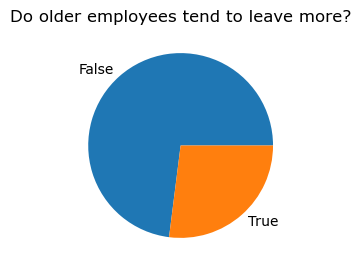

In [11]:
stay.plot(title='Do older employees tend to leave more?', figsize=(8,3), ylabel='', kind='pie')

### Compare average performance scores between employees who left and those who stayed.

In [12]:
left_comp_grp = df.groupby('Left_Company')['Performance_Score'].mean().round(2)
print(f"those who stayed have higher avg performance score {left_comp_grp}")

those who stayed have higher avg performance score Left_Company
No     2.98
Yes    2.94
Name: Performance_Score, dtype: float64


### How many employees have not been appraised in the last 2 years?

In [13]:
not_appraised = (df['Last_Appraisal_Year'] < 2023).sum()
print(f"{not_appraised} employees have not been appraised in the last 2 years")

505 employees have not been appraised in the last 2 years


### Find the top 10 longest-serving employees and their last appraisal year.

In [14]:
top_10 = df[['Name', 'Years_at_Company', 'Last_Appraisal_Year']].nlargest(10, 'Years_at_Company')
top_10

,Name,Years_at_Company,Last_Appraisal_Year
9,Employee_10,29,2021
83,Employee_84,29,2021
89,Employee_90,29,2021
241,Employee_242,29,2023
265,Employee_266,29,2023
269,Employee_270,29,2021
271,Employee_272,29,2023
295,Employee_296,29,2023
304,Employee_305,29,2023
347,Employee_348,29,2022


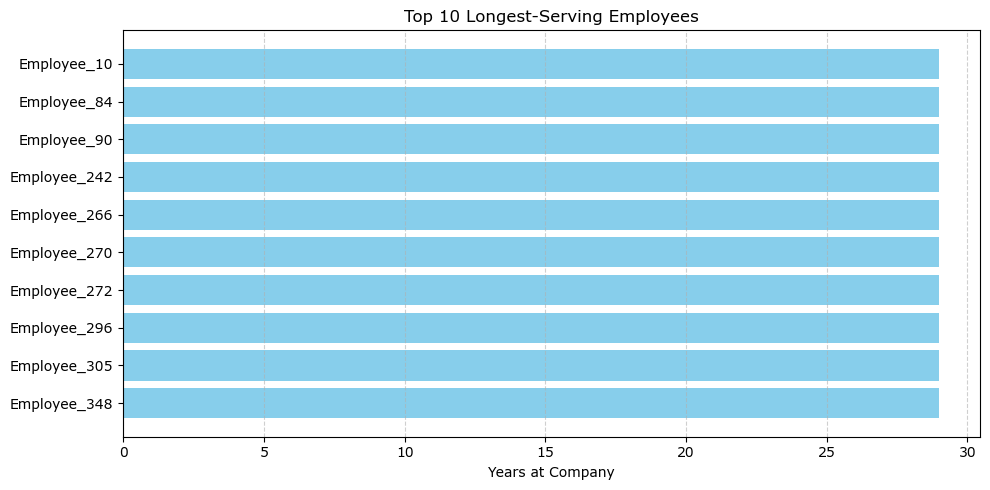

In [15]:
plt.figure(figsize=(10, 5))
plt.barh(top_10['Name'], top_10['Years_at_Company'], color='skyblue')
plt.xlabel('Years at Company')
plt.title('Top 10 Longest-Serving Employees')
plt.gca().invert_yaxis()  # Highest years at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [18]:
df.describe().round(2)

,EmployeeID,Age,Years_at_Company,Monthly_Salary,Performance_Score,Last_Appraisal_Year
count,1000.00,1000.00,1000.00,1000.00,900.00,1000.0
mean,500.50,41.16,15.20,8728.89,2.96,2022.5
std,288.82,10.54,8.58,3464.64,1.15,1.1
min,1.00,22.00,0.00,2511.00,1.01,2021.0
25%,250.75,32.00,8.00,5992.75,1.96,2022.0
50%,500.50,42.00,15.00,8777.00,2.95,2022.0
75%,750.25,50.00,23.00,11568.75,3.95,2023.0
max,1000.00,59.00,29.00,14997.00,5.00,2024.0


### predicting whether an employee might leave the company using basic logic or patterns you see (e.g. low performance + low salary).

In [29]:
df['Risk_of_Exit'] = (df['Performance_Score'] < 3) & (df['Monthly_Salary'] < 3000)
df['Risk_of_Exit'] = df['Risk_of_Exit'].map({True: 'High', False: 'Low'})
df.head(10)

,EmployeeID,Name,Age,Gender,Department,Position,Years_at_Company,Monthly_Salary,Education_Level,Performance_Score,Last_Appraisal_Year,Left_Company,Risk_of_Exit
0,1,Employee_1,50.0,Female,HR,Manager,21,6058.0,PhD,3.95,2021,No,Low
1,2,Employee_2,36.0,Male,Marketing,Manager,18,6978.0,Masters,3.15,2022,No,Low
2,3,Employee_3,29.0,Male,Marketing,Intern,15,14169.0,PhD,4.36,2021,Yes,Low
3,4,Employee_4,42.0,Male,IT,Assistant,20,9031.0,Bachelors,2.36,2024,No,Low
4,5,Employee_5,42.0,Male,Finance,Assistant,26,7120.0,PhD,NaN,2023,Yes,Low
5,6,Employee_6,44.0,Male,Marketing,Manager,23,13378.0,Masters,4.98,2022,Yes,Low
6,7,Employee_7,32.0,Non-Binary,IT,Intern,21,5485.0,Masters,2.26,2021,No,Low
7,8,Employee_8,32.0,Female,Finance,Assistant,3,10612.0,Masters,3.70,2024,Yes,Low
8,9,Employee_9,45.0,Male,Marketing,Assistant,1,8777.0,PhD,4.38,2024,Yes,Low
9,10,Employee_10,57.0,Female,Sales,Assistant,29,5047.0,Bachelors,4.66,2021,Yes,Low


In [30]:
df['Risk_of_Exit'].value_counts()

Risk_of_Exit
Low     978
High     22
Name: count, dtype: int64